# VelocityPlotter.py
## Setup
### Imports
The following libraries need be imported.

In [5]:
import matplotlib.pyplot as plt
import numpy as np 
from mpl_toolkits.mplot3d import Axes3D

### Velocity Vector Field
The following function calculates the velocity vector field in the angular $\theta$ direction for Coaxial Couette Flow (all other components are zero).

In [6]:
def v(r, r1, r2, omega):
    dist = r2**2 - r1**2
    a = (-1 * omega * r1) / dist
    b = (omega * r1 * r2**2)/dist
    return a*r + b/r

### Parameters
The parameters that govern the fluid's flow can be set below. They are:
- `rpm` the number of revolutions completed per minute by the inner cylinder.
- `r1` the radius of the inner cylinder (in metres).
- `r2` the radius of the outer cylinder (in metres).

In this case it is clear that `r2` > `r1`.

In [7]:
rpm = 10
r1 = 3.775/100 
r2 = 6.95/100

assert(r1<r2)

# converts from RPM to rad/s
def convertFromRPM(rpm):
    return rpm*0.104719755

## The Plot
### Number of Vectors
The following three paramters can be adjusted to chnage the number of vectors that are displayed in the: radial $r$, angular $\theta$, and vertical $z$ directions.

In [8]:
radial_points = 10
angular_points = 20
vertical_points = 1

### Cylindrical Coordinates
Below we define our coordinate system under the following constraints:
- $r_1 \leq r \leq r_2$
- $0 \leq \theta \leq 2\pi$
- $0 \leq z \leq 0.3$

We also create a meshgrid so that the vector field can be plotted in 3D.

In [9]:
r = np.linspace(r1, r2, radial_points)
theta = np.linspace(0, 2 * np.pi, angular_points)
z = np.linspace(0, 0.3, vertical_points)

R, Theta, Z = np.meshgrid(r, theta, z)

### Defining the Velocity Field
The components of the velocity vector field ($V_r$,$V_{\theta}$,$V_z$) are defined in cylindrical polar coordinates as:

In [10]:
Vr = 0
Vtheta = v(R,r1,r2,convertFromRPM(rpm))
Vz = 0

### Converting to Cartesian 
The vector field - in cylindrical coordinates - needs to be converted to cartesian coordinates before it can be plotted. The cartesian $x$ and $y$ coordinates are also defined in terms of $r$ and $\theta$.

**Note** that the $z$ component is unaffected by this coordinate transformation.

In [11]:
vec_X = -np.sin(Theta)*Vtheta
vec_Y = np.cos(Theta)*Vtheta
vec_Z = 0

X = R * np.cos(Theta)
Y = R * np.sin(Theta)

### The 3D Vector Field
The velocity vector field is plotted in 3D cartesian coordinates below. 

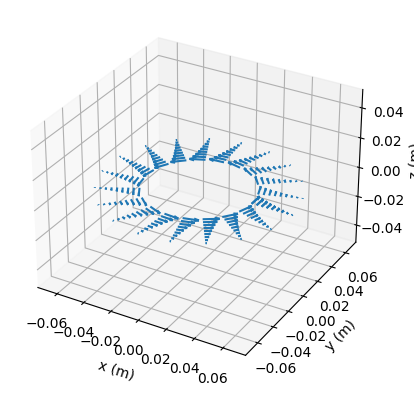

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, vec_X, vec_Y, vec_Z, length = 0.01, normalize = False)
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
plt.show()